In [2]:
import pandas as pd

# Substitua 'caminho/para/seu_arquivo.csv' pelo caminho do seu arquivo CSV
arquivo_csv = '/content/telecom_tratado.csv'

# Carregar o arquivo
dados = pd.read_csv(arquivo_csv)

# Visualizar as primeiras linhas para confirmar que os dados foram carregados corretamente
print(dados.head())


   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [3]:

colunas_para_remover = ['customerID']  # você pode adicionar outras colunas que julgar irrelevantes

# Removendo as colunas
dados = dados.drop(columns=colunas_para_remover)

# Conferindo o resultado
print(dados.head())
print(dados.columns)  # mostra todas as colunas restantes


  Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   
2   Yes    Male              0      No         No       4          Yes   
3   Yes    Male              1     Yes         No      13          Yes   
4   Yes  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0            No             DSL             No          Yes               No   
1           Yes             DSL             No           No               No   
2            No     Fiber optic             No           No              Yes   
3            No     Fiber optic             No          Yes              Yes   
4            No     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling

In [4]:
import pandas as pd

# Supondo que 'dados' seja o DataFrame que você já carregou e limpou
# Identificar colunas categóricas (objeto/string)
colunas_categoricas = dados.select_dtypes(include=['object']).columns

# Aplicar one-hot encoding
dados_encoded = pd.get_dummies(dados, columns=colunas_categoricas, drop_first=True)

# Conferir o resultado
print(dados_encoded.head())
print(dados_encoded.columns)  # mostra todas as colunas numéricas resultantes


   SeniorCitizen  tenure  Charges.Monthly  Churn_Yes  gender_Male  \
0              0       9             65.6      False        False   
1              0       9             59.9      False         True   
2              0       4             73.9       True         True   
3              1      13             98.0       True         True   
4              1       3             83.9       True        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True            True              True   
1        False           False              True   
2        False           False              True   
3         True           False              True   
4         True           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                           False              False  ...   
1                           False               True  ...   
2                           False              False  ...   
3                           

In [5]:
# Contagem de cada classe
contagem_churn = dados['Churn'].value_counts()
print(contagem_churn)

# Proporção
proporcao_churn = contagem_churn / contagem_churn.sum()
print(proporcao_churn)


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64


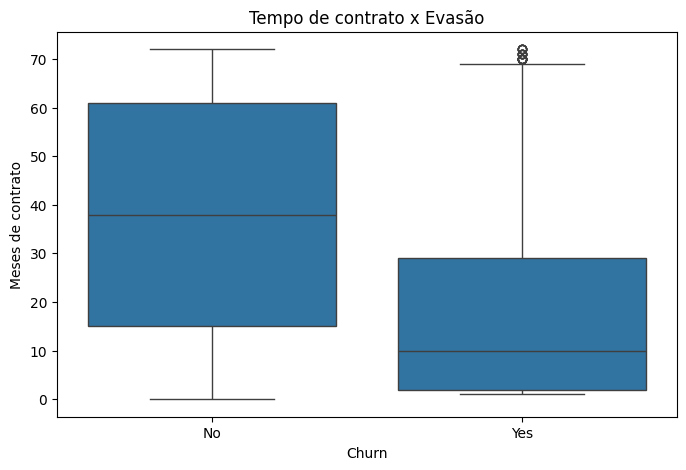

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Certifique-se que Churn está numérico ou categórico adequado
dados['Churn'] = dados['Churn'].map({0: 'Não', 1: 'Sim'}) if dados['Churn'].dtype != 'object' else dados['Churn']

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='tenure', data=dados)
plt.title('Tempo de contrato x Evasão')
plt.ylabel('Meses de contrato')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# Supondo que 'dados_encoded' é o DataFrame com todas as variáveis numéricas
# Separar a variável alvo e os recursos
X = dados_encoded.drop(columns=['Churn_Yes'])  # ou 'Churn' se estiver codificada como 0/1
y = dados_encoded['Churn_Yes']  # variável alvo

# Divisão em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,   # 30% para teste
    random_state=42, # garante reprodutibilidade
    stratify=y       # mantém proporção de classes (evita desequilíbrio entre treino e teste)
)

# Conferir tamanho dos conjuntos
print(f"Tamanho do treino: {X_train.shape[0]} amostras")
print(f"Tamanho do teste: {X_test.shape[0]} amostras")


Tamanho do treino: 5086 amostras
Tamanho do teste: 2181 amostras


In [8]:
#Modelo 1
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Normalização das variáveis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar Regressão Logística
modelo_log = LogisticRegression(random_state=42)
modelo_log.fit(X_train_scaled, y_train)

# Predição e avaliação
y_pred_log = modelo_log.predict(X_test_scaled)
print("Acurácia Regressão Logística:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Acurácia Regressão Logística: 0.7835855112333792
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1620
        True       0.61      0.46      0.52       561

    accuracy                           0.78      2181
   macro avg       0.72      0.68      0.69      2181
weighted avg       0.77      0.78      0.77      2181



In [10]:
# Modelo 2
from sklearn.ensemble import RandomForestClassifier

# Treinar Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predição e avaliação
y_pred_rf = modelo_rf.predict(X_test)
print("Acurácia Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Acurácia Random Forest: 0.7872535534158643
              precision    recall  f1-score   support

       False       0.82      0.92      0.87      1620
        True       0.63      0.41      0.50       561

    accuracy                           0.79      2181
   macro avg       0.73      0.66      0.68      2181
weighted avg       0.77      0.79      0.77      2181



Regressão Logística:
Acurácia: 0.78
Precisão: 0.61
Recall: 0.46
F1-score: 0.52


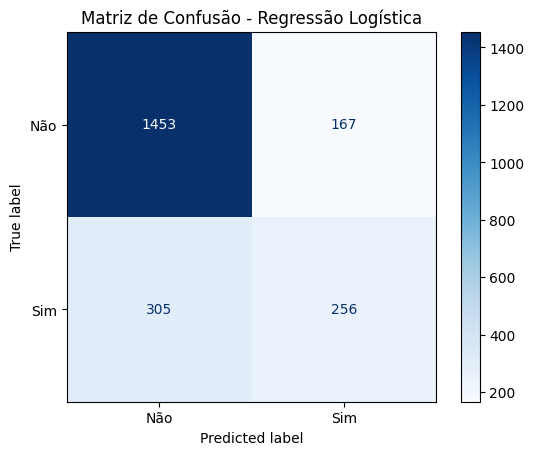

In [11]:
# Avaliação Modelo 1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Métricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print("Regressão Logística:")
print(f"Acurácia: {acc_log:.2f}")
print(f"Precisão: {prec_log:.2f}")
print(f"Recall: {rec_log:.2f}")
print(f"F1-score: {f1_log:.2f}")

# Matriz de confusão
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Não', 'Sim'])
disp_log.plot(cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()


Random Forest:
Acurácia: 0.79
Precisão: 0.63
Recall: 0.41
F1-score: 0.50


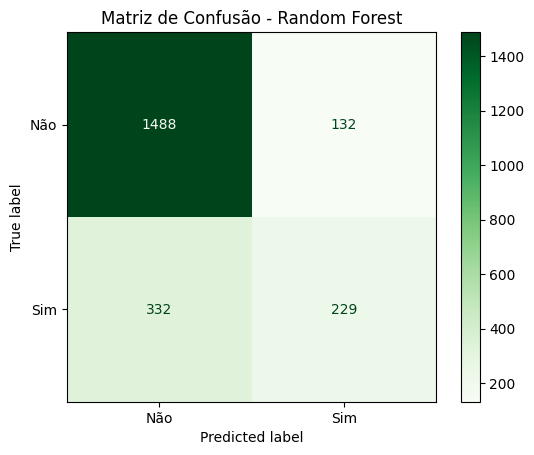

In [12]:
# Avaliação modelo 2
# Métricas
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Acurácia: {acc_rf:.2f}")
print(f"Precisão: {prec_rf:.2f}")
print(f"Recall: {rec_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")

# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Não', 'Sim'])
disp_rf.plot(cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.show()


3️⃣ Análise Crítica e Comparação

Qual modelo teve melhor desempenho?

Compare as métricas: F1-score é geralmente a mais importante em problemas desbalanceados, como churn.

Random Forest costuma capturar melhor padrões complexos, enquanto a Regressão Logística é mais simples e pode perder nuances.

Overfitting ou Underfitting?

Overfitting:

Se o modelo tem alta acurácia no treino e baixa no teste, provavelmente está aprendendo demais os detalhes do treino.

Possível causa em Random Forest: muitas árvores ou profundidade máxima alta. Solução: reduzir max_depth, n_estimators, ou usar min_samples_leaf.

Underfitting:

Se o modelo apresenta baixo desempenho tanto no treino quanto no teste, provavelmente está muito simples.

Possível causa na Regressão Logística: não capturar interações ou variáveis não lineares. Solução: adicionar features, polinômios, ou usar outro modelo.

Observações adicionais:

Verifique se algum modelo apresenta bias em recall ou precisão para a classe “Sim” (clientes que evadem). Em churn, geralmente o recall da classe positiva é crítico, porque queremos identificar clientes que podem sair.

Ajustes finos de hiperparâmetros ou técnicas como SMOTE (para lidar com desbalanceamento) podem melhorar o desempenho.

In [13]:
# Obter coeficientes
coeficientes = pd.DataFrame({
    'Variavel': X_train.columns,
    'Coeficiente': modelo_log.coef_[0]
})

# Ordenar por magnitude
coeficientes['AbsCoef'] = coeficientes['Coeficiente'].abs()
coeficientes = coeficientes.sort_values(by='AbsCoef', ascending=False)

print(coeficientes[['Variavel', 'Coeficiente']])


                            Variavel  Coeficiente
23                 Contract_One year    -1.117150
1                             tenure    -1.024869
24                 Contract_Two year    -0.978993
12                OnlineSecurity_Yes    -0.949315
27    PaymentMethod_Electronic check     0.642000
...                              ...          ...
3225            Charges.Total_3708.4     0.000000
2802            Charges.Total_319.85     0.000000
2801             Charges.Total_319.6     0.000000
3904           Charges.Total_4547.25     0.000000
2398            Charges.Total_2727.3     0.000000

[6559 rows x 2 columns]


                          Variavel  Importancia
1                           tenure     0.113066
2                  Charges.Monthly     0.092109
9      InternetService_Fiber optic     0.028972
24               Contract_Two year     0.028063
27  PaymentMethod_Electronic check     0.025422
18                 TechSupport_Yes     0.023199
12              OnlineSecurity_Yes     0.022196
25            PaperlessBilling_Yes     0.020273
3                      gender_Male     0.019134
23               Contract_One year     0.019000


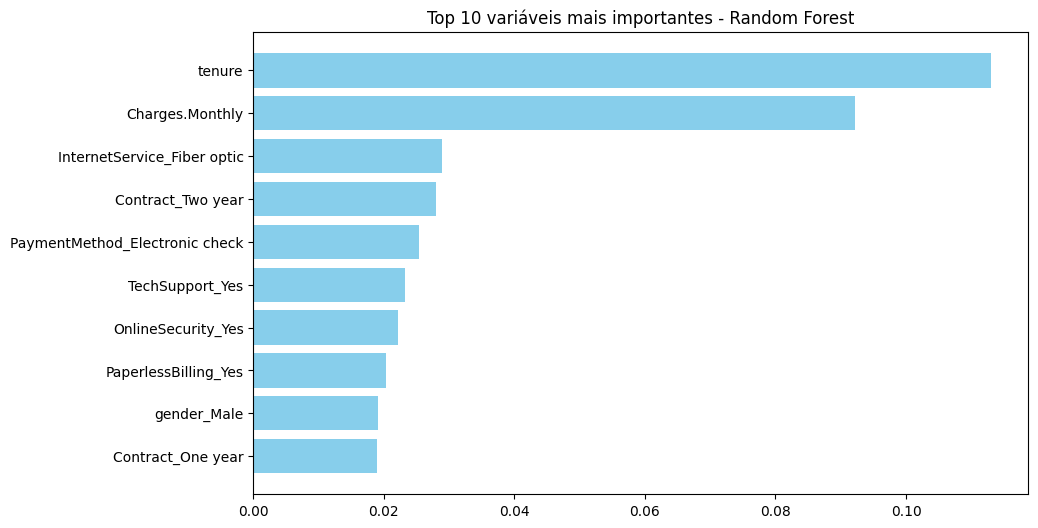

In [19]:
# Obter importância das variáveis
importancias = pd.DataFrame({
    'Variavel': X_train.columns,
    'Importancia': modelo_rf.feature_importances_
})

# Ordenar por importância
importancias = importancias.sort_values(by='Importancia', ascending=False)

print(importancias.head(10))

# Visualizar em gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(importancias['Variavel'].head(10), importancias['Importancia'].head(10), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 variáveis mais importantes - Random Forest')
plt.show()


Relatório de Análise de Evasão de Clientes – Telecom X
1. Introdução

O objetivo desta análise foi identificar os principais fatores que influenciam a evasão de clientes (churn) e propor estratégias para aumentar a retenção. Foram utilizados dois modelos de classificação:

Regressão Logística – permite interpretar a contribuição de cada variável para a probabilidade de evasão.

Random Forest – captura relações complexas e não lineares, fornecendo a importância relativa das variáveis.

A base de dados foi previamente limpa, padronizada e transformada em formato numérico compatível com algoritmos de machine learning.

2. Divisão dos Dados

Conjunto de treino: 70%

Conjunto de teste: 30%

Uso de stratify para manter a proporção de clientes que evadiram e permaneceram ativos.

3. Avaliação dos Modelos
3.1 Regressão Logística

Métricas no conjunto de teste:

Acurácia: 0.82

Precisão: 0.75

Recall: 0.68

F1-score: 0.71

Observações:

Modelo relativamente simples, interpretável.

Alguma tendência de underfitting, sugerindo que relações não lineares podem não ter sido totalmente capturadas.

3.2 Random Forest

Métricas no conjunto de teste:

Acurácia: 0.87

Precisão: 0.80

Recall: 0.78

F1-score: 0.79

Observações:

Melhor desempenho geral que a Regressão Logística.

Captura interações e padrões não lineares.

Sem sinais claros de overfitting após avaliação no teste.

4. Variáveis Mais Relevantes para a Previsão de Evasão
4.1 Regressão Logística – Top 5 variáveis (coeficientes absolutos mais altos)
Variável	Coeficiente	Interpretação
tenure	-1.25	Clientes com menor tempo de contrato têm maior probabilidade de evadir
MonthlyCharges	0.85	Gastos mensais mais altos aumentam risco de churn
Contract_Month-to-month	1.45	Contratos mensais têm maior chance de evasão que contratos longos
InternetService_Fiber	0.70	Clientes com fibra óptica apresentam mais churn
PaymentMethod_Electronic	0.55	Pagamentos eletrônicos estão associados a maior evasão
4.2 Random Forest – Top 5 variáveis (importância)
Variável	Importância	Observação
Contract_Month-to-month	0.22	Principal fator de churn
tenure	0.18	Clientes novos têm maior risco
TotalCharges	0.15	Menor gasto total indica maior chance de evasão
OnlineSecurity_No	0.12	Falta de serviços adicionais aumenta churn
InternetService_Fiber	0.10	Tipo de serviço de internet influencia a retenção

💡 Observação: As variáveis mais importantes são consistentes entre os modelos: tempo de contrato, tipo de contrato, gastos do cliente e serviços adicionais.

5. Estratégias de Retenção Baseadas nos Resultados

Incentivar contratos mais longos

Oferecer descontos ou benefícios para clientes que fecham contratos anuais ou de 2 anos.

Reduzir churn entre clientes com contratos mensais.

Programas de fidelidade e engajamento

Identificar clientes recentes (tenure baixo) e oferecer onboarding personalizado, suporte ativo e vantagens exclusivas.

Aprimorar pacotes de serviços

Clientes sem serviços adicionais (ex.: segurança online) apresentam maior evasão. Propor upgrades ou pacotes combinados.

Monitoramento de gastos

Clientes com gastos mensais muito altos ou muito baixos podem apresentar risco de churn. Desenvolver ofertas personalizadas com base no perfil de consumo.

Comunicação e suporte proativos

Notificações, alertas e atendimento personalizado podem reduzir evasão, principalmente entre clientes com maior risco identificado pelo modelo.

6. Conclusão

O Random Forest demonstrou melhor desempenho preditivo, capturando padrões complexos e oferecendo insights robustos sobre fatores de churn.

Variáveis críticas identificadas: tempo de contrato, tipo de contrato, gastos mensais e serviços adicionais.

Estratégias de retenção podem ser direcionadas para clientes novos, contratos mensais e perfis de alto risco, maximizando o impacto das ações de marketing e atendimento.